Naive Bayes

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [10]:
df = pd.read_csv(r"C:\Users\tania\Desktop\Breastcancerdata.csv")
#dataset from https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

In [11]:
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,B
1,20.57,17.77,132.90,1326.0,0.08474,B
2,19.69,21.25,130.00,1203.0,0.10960,B
3,11.42,20.38,77.58,386.1,0.14250,B
4,20.29,14.34,135.10,1297.0,0.10030,B
5,12.45,15.70,82.57,477.1,0.12780,B
6,18.25,19.98,119.60,1040.0,0.09463,B
7,13.71,20.83,90.20,577.9,0.11890,B
8,13.00,21.82,87.50,519.8,0.12730,B
9,12.46,24.04,83.97,475.9,0.11860,B


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    object 
dtypes: float64(5), object(1)
memory usage: 26.8+ KB


Visualizing Dataset

In [13]:
M = df[df.diagnosis == "M"]

In [14]:
B = df[df.diagnosis == "B"]

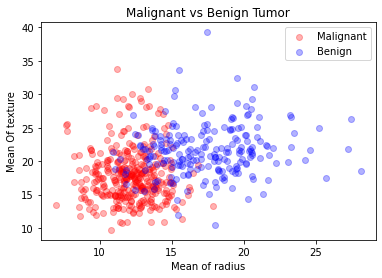

In [16]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Mean of radius")
plt.ylabel("Mean Of texture")
plt.scatter(M.mean_radius, M.mean_texture, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.mean_radius, B.mean_texture, color = "blue", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

Assigning numeric value of ‘1’ to malignant tumors and ‘0’ to benign tumors.

In [17]:
df.diagnosis = [1 if i == "M" else 0 for i in df.diagnosis]

In [19]:
x = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis.values

 Normalization:

In [20]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [23]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9473684210526315


Another example

In [24]:
df = pd.read_csv(r"C:\Users\tania\Desktop\Weatherprediction.csv")

In [25]:
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
#Encoding the strings to Numericals
outlook_at=LabelEncoder()
Temp_at=LabelEncoder()
Hum_at=LabelEncoder()
win_at=LabelEncoder()

In [28]:
#Dropping the target variable and make it is as newframe
inputs=df.drop('Play',axis='columns')
target=df['Play']
target

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [29]:
#Creating the new dataframe
inputs['outlook_n']= outlook_at.fit_transform(inputs['Outlook'])
inputs['Temp_n']= outlook_at.fit_transform(inputs['Temp'])
inputs['Hum_n']= outlook_at.fit_transform(inputs['Humidity'])
inputs['win_n']= outlook_at.fit_transform(inputs['Windy'])
inputs

,Outlook,Temp,Humidity,Windy,outlook_n,Temp_n,Hum_n,win_n
0,Rainy,Hot,High,f,1,1,0,0
1,Rainy,Hot,High,t,1,1,0,1
2,Overcast,Hot,High,f,0,1,0,0
3,Sunny,Mild,High,f,2,2,0,0
4,Sunny,Cool,Normal,f,2,0,1,0
5,Sunny,Cool,Normal,t,2,0,1,1
6,Overcast,Cool,Normal,t,0,0,1,1
7,Rainy,Mild,High,f,1,2,0,0
8,Rainy,Cool,Normal,f,1,0,1,0
9,Sunny,Mild,Normal,f,2,2,1,0


In [30]:
#Dropping the string values
inputs_n=inputs.drop(['Outlook','Temp','Humidity','Windy'],axis='columns')
inputs_n

,outlook_n,Temp_n,Hum_n,win_n
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [31]:
#Applying the Gaussian naivebayes
classifier = GaussianNB()
classifier.fit(inputs_n,target)

GaussianNB()

In [32]:
#accuracy 
classifier.score(inputs_n,target)

0.8571428571428571

In [33]:
#Prediction 1st row
classifier.predict([[1,1,0,0]])

array(['no'], dtype='<U3')